In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [91]:
# Loading data set with various information about professional boxing matches. The information included is for both boxers
# competing in the fight. They are marked as boxer A and boxer B.

df = pd.read_csv('C:\\Users\\kenne\\Desktop\\bouts_out_new.csv', encoding='utf-8')

df.head()

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,...,33,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,...,34,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,...,13,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,...,32,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,...,32,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0


There are the following features included in this dataset:

age, years
height, cm
reach, cm
stance, orthodox/southpaw
weight, lbs
won - number of past wins
lost- number of past loses
drawn - number of past draws
kos - number of wins by knockout
result - bout result - win_A/win_B/draw
decision - type of judge decision. Possible values:
SD - splitted decision - Two judges have scored in favour of one boxer and the other judge has scored in favour of the other
MD - majority decision - Two judges have scored in favour of one boxer and the other judge has scored in favour of a draw
UD - unanimous decision - All three judges have scored in agreement
KO - knock out - A boxer is knocked down and the referee has counted to 10 before he can rise
TKO - technical knock out - The referee has stopped the fight due to a boxer being in no fit condition to continue
DQ - A boxer is disqualified by the referee and loses the bout when he repeatedly or severely fouls or infringes the rules
RTD - A boxer has retired between rounds
judge[1,2,3] - judges scores for certain boxer (aka scorecards)

In [67]:
# df.info()

In [81]:
df.describe()

,age_A,age_B,height_A,height_B,reach_A,reach_B,weight_A,weight_B,won_A,won_B,...,drawn_A,drawn_B,kos_A,kos_B,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
count,352888.000000,257935.000000,249246.000000,134640.000000,112342.000000,37873.000000,135573.000000,130358.000000,387427.000000,387427.000000,...,387427.000000,387427.000000,387427.000000,387348.000000,52248.000000,52060.000000,70371.000000,70032.000000,61231.000000,61023.000000
mean,24.416041,26.583345,172.786657,172.882657,178.848605,179.001030,146.340636,147.089484,23.108438,15.159080,...,2.826481,2.636375,10.338887,6.234735,62.778901,59.509700,59.560941,56.570411,60.784276,57.995215
std,6.523590,11.823224,9.130127,9.430631,12.002404,14.867537,30.240142,30.624890,27.629901,19.938137,...,5.584610,5.027003,12.392049,8.750690,30.337580,29.285058,31.021367,30.260935,31.910461,31.170590
min,-74.000000,-74.000000,2.000000,15.000000,5.000000,1.000000,10.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,23.000000,166.000000,167.000000,170.000000,171.000000,125.000000,126.000000,5.000000,2.000000,...,0.000000,0.000000,2.000000,0.000000,39.000000,37.000000,39.000000,36.000000,39.000000,36.000000
50%,24.000000,26.000000,173.000000,173.000000,178.000000,178.000000,140.000000,140.000000,14.000000,8.000000,...,1.000000,1.000000,6.000000,3.000000,59.000000,54.000000,58.000000,54.000000,58.000000,54.000000
75%,27.000000,30.000000,178.000000,179.000000,185.000000,185.000000,160.000000,160.000000,31.000000,21.000000,...,3.000000,3.000000,14.000000,9.000000,80.000000,79.000000,80.000000,75.000000,80.000000,78.000000
max,1818.000000,2016.000000,255.000000,255.000000,456.000000,456.000000,363.000000,450.000000,332.000000,251.000000,...,77.000000,76.000000,131.000000,128.000000,540.000000,291.000000,299.000000,294.000000,300.000000,295.000000


There is missing data and noticeable errors in the data that I will scrub. For example:

The minimum age limit to turn professional in Mexico is 15 and there is no maximum age limit (although after a certain age you have to pass a physical exam/test).

The oldest active boxer is Stephen "Steve" Ward (UK, born August 12, 1956), who was 59 years 122 days old at the time of his most recent bout in Nottinghamshire, UK, on December 12, 2015. We'll assume he's still an active boxer today and will not retire this year (2018).

255 cm is over 8 feet tall. The tallest and heaviest boxer ever was Nikolai Valuev at 7 feet tall (213.36 cm) and 323 lbs. Jacob (Baby Jake) Matlala was the shortest known boxer ever at 4 feet 11 inches (149.86 cm). Baby Jake also had one of the shortest reaches ever at 59 inches (149.86 cm).

The lowest weight class in professional boxing is known as strawweight, minimumweight, or mini flyweight. It classifies boxers who weigh no more than 105 pounds.

When Manute Bol from the NBA fought William "Refrigerator" Perry from the NFL in a "Celebrity Boxing" event, Bol became the boxer with the longest recorded reach, reportedly at 102 inches (259.08 cm).

I'm not concerned with the maximum number of wins reported for either boxer as Len Wickwar has the most wins in boxing with 337.

I will set my limits based on those specifications/approximations.

In [82]:
fil = (
    (df.height_A < 214) & (df.height_A > 149) &
    (df.height_B < 214) & (df.height_B > 149) &
    (df.weight_B > 105) & (df.weight_A > 105) &
    (df.weight_B < 324) & (df.weight_A < 324) &
    (df.age_A < 63) & (df.age_A > 14) &
    (df.age_B < 63) & (df.age_B > 14) &
    (df.reach_A < 260) & (df.reach_A > 149) &
    (df.reach_B < 260) & (df.reach_B > 149)
) 

df = df[fil]

# df.info()

In [83]:
df.describe()

,age_A,age_B,height_A,height_B,reach_A,reach_B,weight_A,weight_B,won_A,won_B,...,drawn_A,drawn_B,kos_A,kos_B,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
count,7606.000000,7606.000000,7606.000000,7606.000000,7606.000000,7606.000000,7606.000000,7606.000000,7606.000000,7606.000000,...,7606.000000,7606.00000,7606.000000,7606.000000,2922.000000,2917.000000,3213.000000,3204.000000,3182.000000,3181.000000
mean,26.786747,28.245201,176.033921,175.287405,181.502235,180.664475,157.193268,157.658428,31.100973,28.199711,...,1.794767,2.12569,18.041283,15.919143,84.989049,81.231059,81.544662,78.255306,81.751728,78.794719
std,5.188113,5.277415,9.369129,9.182736,11.910600,11.818125,37.705625,38.117367,29.643755,24.268582,...,4.345812,4.56142,15.006819,13.325576,30.429391,29.653117,33.814475,32.971739,33.400967,32.827800
min,15.000000,15.000000,150.000000,150.000000,152.000000,150.000000,106.000000,106.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,24.000000,170.000000,168.000000,173.000000,173.000000,130.000000,130.000000,14.000000,14.000000,...,0.000000,0.00000,8.000000,7.000000,60.000000,56.000000,58.000000,54.000000,58.000000,55.000000
50%,26.000000,28.000000,175.000000,175.000000,180.000000,180.000000,147.000000,147.000000,24.000000,23.000000,...,0.000000,1.00000,15.000000,13.000000,96.000000,90.000000,94.000000,90.000000,94.000000,90.000000
75%,30.000000,32.000000,183.000000,182.000000,188.000000,188.000000,174.000000,175.000000,38.000000,35.000000,...,1.000000,2.00000,24.000000,22.000000,114.000000,109.000000,113.000000,109.000000,113.000000,109.000000
max,54.000000,51.000000,213.000000,213.000000,224.000000,224.000000,319.000000,316.000000,258.000000,223.000000,...,60.000000,58.00000,131.000000,121.000000,237.000000,225.000000,239.000000,232.000000,238.000000,232.000000


In [84]:
# The 'judge' columns will not be useful for my purpose and will be dropped as a final clean-up effort.

df.drop(['judge1_A', 'judge1_B', 'judge2_A', 'judge2_B', 'judge3_A', 'judge3_B'], 1, inplace=True)

df.head()

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,won_A,won_B,lost_A,lost_B,drawn_A,drawn_B,kos_A,kos_B,result,decision
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,37,49,0,1,0,1,33,34.0,draw,SD
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,48,50,1,2,1,1,34,32.0,win_A,UD
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,46,31,1,3,1,0,32,19.0,win_A,KO
6,23.0,31.0,175.0,175.0,179.0,188.0,orthodox,orthodox,155.0,155.0,43,19,1,1,1,2,31,12.0,win_A,SD
10,22.0,28.0,175.0,177.0,179.0,175.0,orthodox,orthodox,154.0,153.0,40,30,0,4,1,0,29,18.0,win_A,TKO


c:\users\kenne\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\kenne\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\kenne\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\kenne\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warn

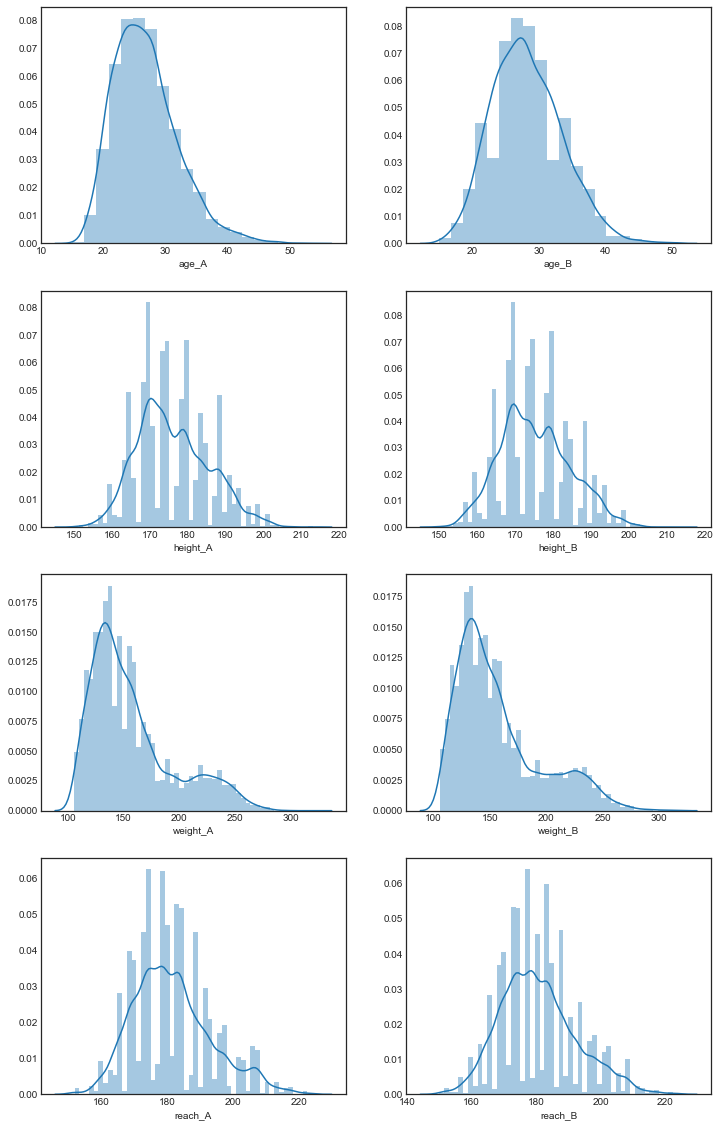

In [85]:
fig, ax = plt.subplots(4,2, figsize=(12, 20))

sns.distplot(df.age_A, bins = 20, ax=ax[0][0])
sns.distplot(df.age_B, bins = 20, ax=ax[0][1])

sns.distplot(df.height_A, bins = 50, ax=ax[1][0])
sns.distplot(df.height_B, bins = 50, ax=ax[1][1])

sns.distplot(df.weight_A, bins = 50, ax=ax[2][0])
sns.distplot(df.weight_B, bins = 50, ax=ax[2][1])

sns.distplot(df.reach_A, bins = 50, ax=ax[3][0])
sns.distplot(df.reach_B, bins = 50, ax=ax[3][1])

plt.show()

The research question:

The fighter with the greater physical features will win the fight the majority of the time.

Categorical variable(s) = result

Continuous variable(s) = age, height, weight, reach

In [86]:
df2 = df

df2.drop(['stance_A', 'stance_B', 'won_A', 'won_B', 'lost_A', 'lost_B', 'drawn_A', 'drawn_B', 'kos_A', 'kos_B', 'result',
          'decision'], 1, inplace=True)

df2.head()

,age_A,age_B,height_A,height_B,reach_A,reach_B,weight_A,weight_B
0,35.0,27.0,179.0,175.0,178.0,179.0,160.0,160.0
1,26.0,31.0,175.0,185.0,179.0,185.0,164.0,164.0
3,25.0,29.0,175.0,174.0,179.0,180.0,155.0,155.0
6,23.0,31.0,175.0,175.0,179.0,188.0,155.0,155.0
10,22.0,28.0,175.0,177.0,179.0,175.0,154.0,153.0


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


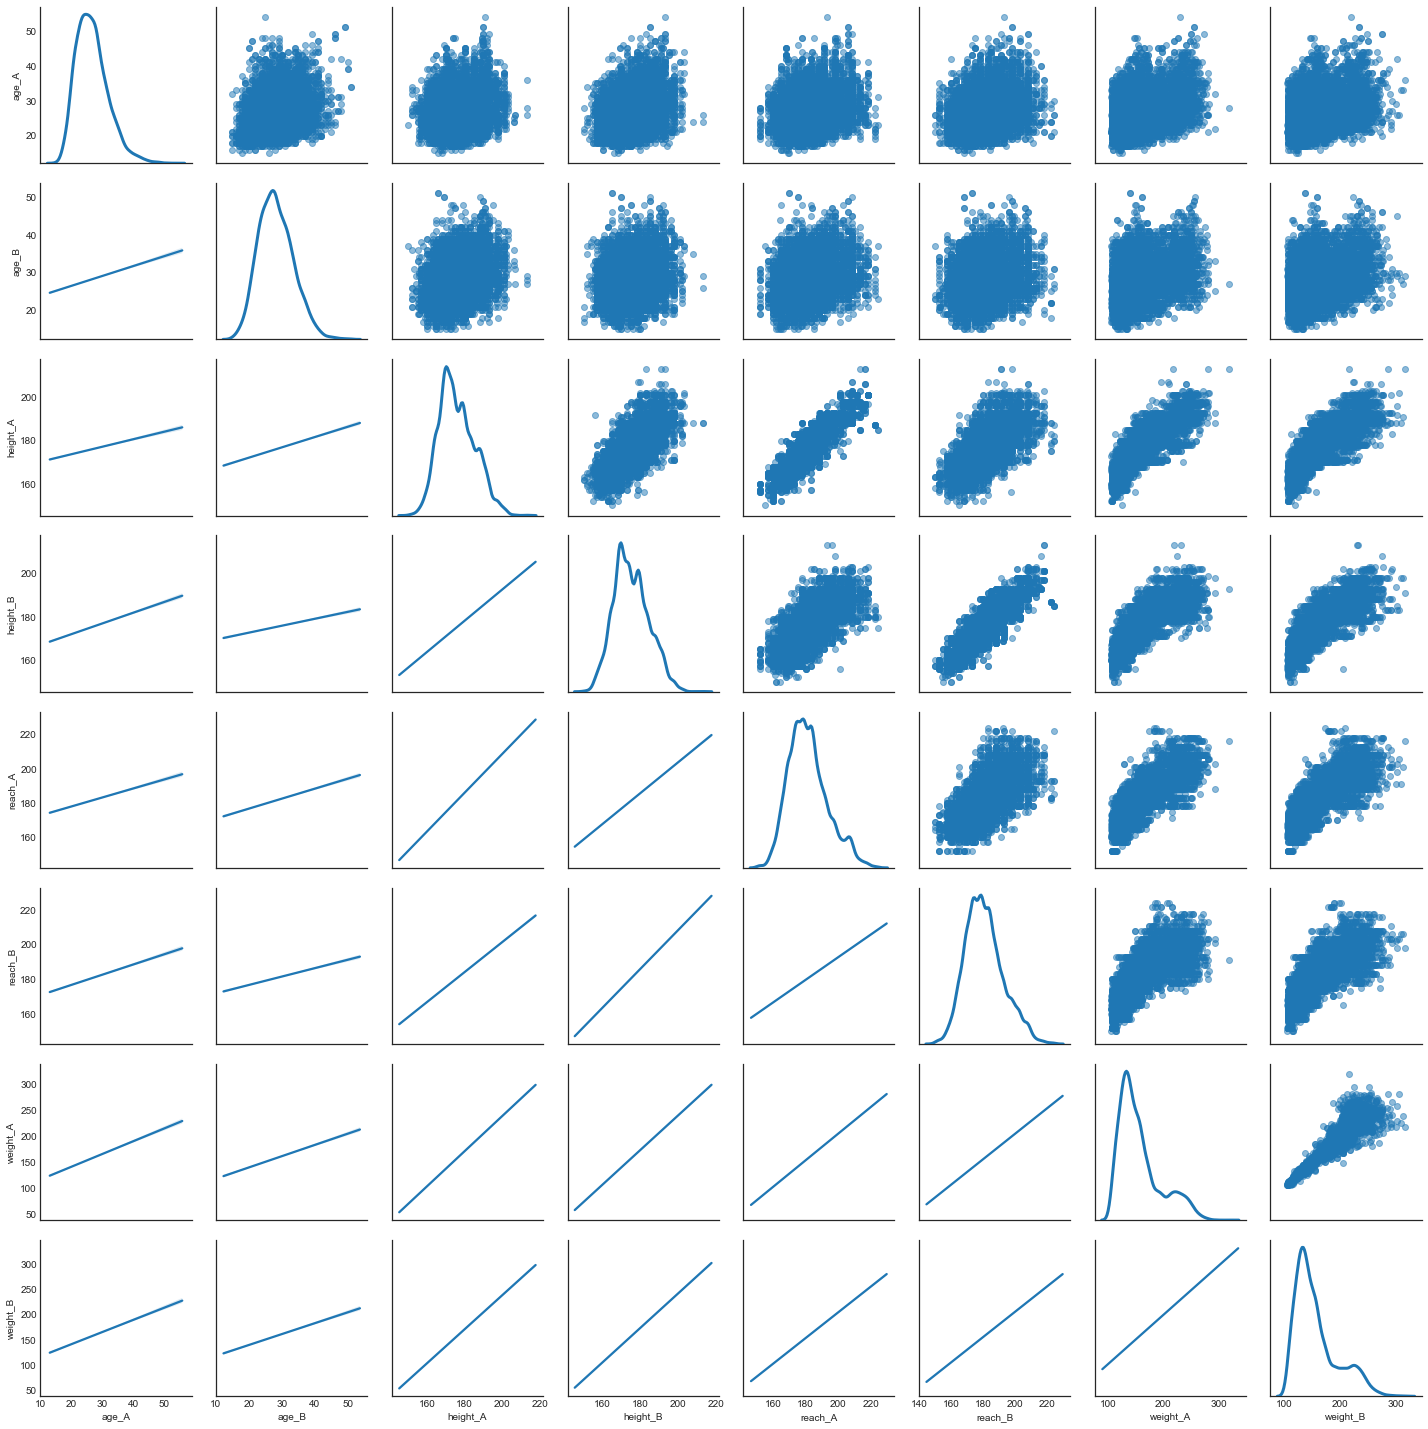

In [87]:
sns.set_style("white")

g = sns.PairGrid(df2, diag_sharey=False)

g.map_upper(plt.scatter, alpha=.5)

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

g.map_diag(sns.kdeplot, lw=3)

plt.show()

             age_A     age_B  height_A  height_B   reach_A   reach_B  \
age_A     1.000000  0.256526  0.191814  0.279725  0.228682  0.258966   
age_B     0.256526  1.000000  0.268929  0.184750  0.258761  0.217670   
height_A  0.191814  0.268929  1.000000  0.737623  0.891905  0.688775   
height_B  0.279725  0.184750  0.737623  1.000000  0.694426  0.871481   
reach_A   0.228682  0.258761  0.891905  0.694426  1.000000  0.664712   
reach_B   0.258966  0.217670  0.688775  0.871481  0.664712  1.000000   
weight_A  0.336418  0.302953  0.838948  0.808465  0.812272  0.766843   
weight_B  0.325908  0.298235  0.826501  0.818806  0.797991  0.775456   

          weight_A  weight_B  
age_A     0.336418  0.325908  
age_B     0.302953  0.298235  
height_A  0.838948  0.826501  
height_B  0.808465  0.818806  
reach_A   0.812272  0.797991  
reach_B   0.766843  0.775456  
weight_A  1.000000  0.963917  
weight_B  0.963917  1.000000  


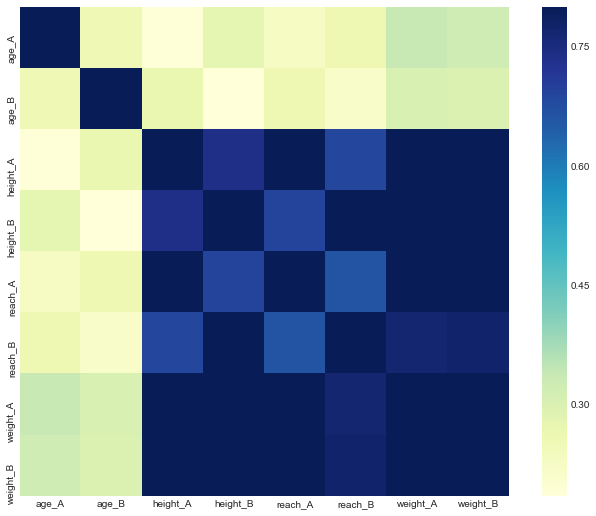

In [88]:
corrmat = df2.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, cmap='YlGnBu', square=True)
plt.show()

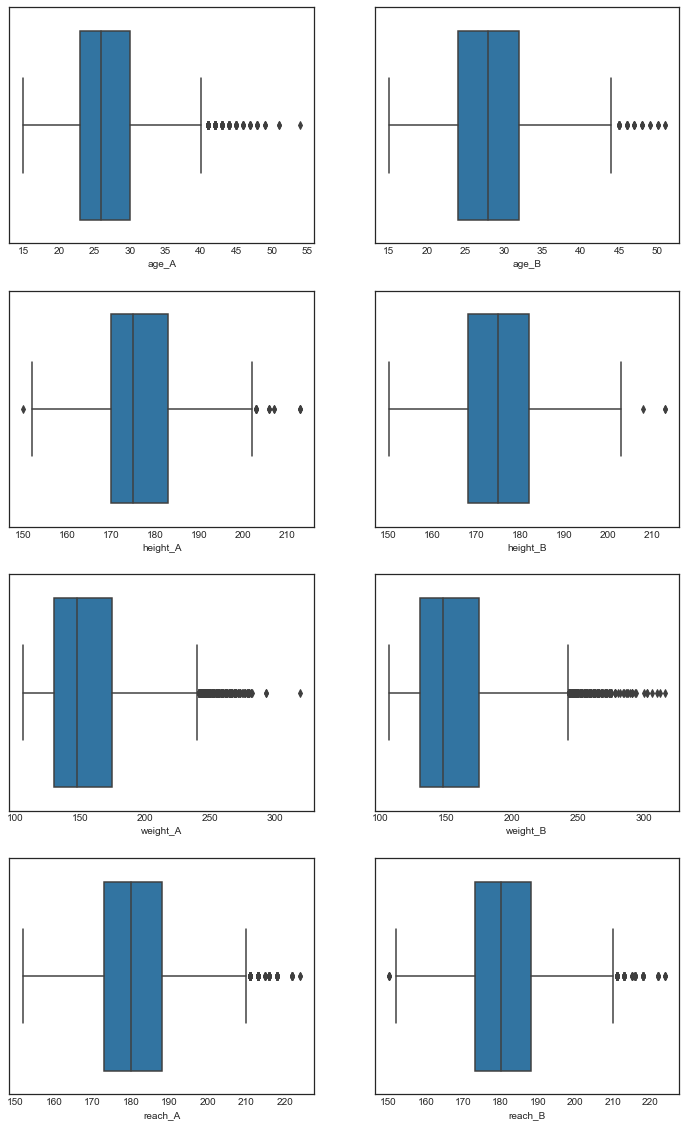

In [89]:
fig, ax = plt.subplots(4,2, figsize=(12, 20))

sns.boxplot(df.age_A, ax=ax[0][0])
sns.boxplot(df.age_B, ax=ax[0][1])

sns.boxplot(df.height_A, ax=ax[1][0])
sns.boxplot(df.height_B, ax=ax[1][1])

sns.boxplot(df.weight_A, ax=ax[2][0])
sns.boxplot(df.weight_B, ax=ax[2][1])

sns.boxplot(df.reach_A, ax=ax[3][0])
sns.boxplot(df.reach_B, ax=ax[3][1])

plt.show()

In [92]:
# Create 10 new features:

# This gives us the age difference between fighters, which could be seen as an advantage depending on the size of the age gap.
df['age_diff'] = df.age_A - df.age_B

# Each of these highlights the physical features advantages one boxer has over another.
df['height_adv'] = df.height_A - df.height_B
df['reach_adv'] = df.reach_A - df.reach_B
df['weight_adv'] = df.weight_A - df.weight_B

# Create an experience feature where a significant gap in experience can be seen as an advantage in a fight.
df['total_fights_A'] = df.won_A + df.lost_A + df.drawn_A
df['total_fights_B'] = df.won_B + df.lost_B + df.drawn_B
df['experience'] = df.total_fights_A - df.total_fights_B

# Create a winning percentage feature that shows which fighter wins more fights on average.
df['winning%A'] = df.won_A / df.total_fights_A
df['winning%B'] = df.won_B / df.total_fights_B

# Create a knockout percentage in fights won feature that shows which fighter punches harder.
df['ko%A'] = df.kos_A / df.won_A
df['ko%B'] = df.kos_B / df.won_B

# Create a losing percentage feature that shows which fighter loses more fights on average.
df['losing%A'] = df.lost_A / df.total_fights_A
df['losing%B'] = df.lost_B / df.total_fights_B

In [73]:
df.head()

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,weight_adv,total_fights_A,total_fights_B,experience,winning%A,winning%B,ko%A,ko%B,losing%A,losing%B
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,...,0.0,37,51,-14,1.000000,0.960784,0.891892,0.693878,0.000000,0.019608
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,...,0.0,50,53,-3,0.960000,0.943396,0.708333,0.640000,0.020000,0.037736
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,...,0.0,24,49,-25,0.958333,0.959184,0.565217,0.702128,0.000000,0.020408
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,...,0.0,48,34,14,0.958333,0.911765,0.695652,0.612903,0.020833,0.088235
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,...,NaN,47,44,3,0.957447,0.909091,0.711111,0.825000,0.021277,0.090909


,age_diff
result,
draw,-0.359086
win_A,-1.988904
win_B,0.863457


In [96]:
fil = (
    (df.height_A < 214) & (df.height_A > 149) &
    (df.height_B < 214) & (df.height_B > 149) &
    (df.weight_B > 105) & (df.weight_A > 105) &
    (df.weight_B < 324) & (df.weight_A < 324) &
    (df.age_A < 63) & (df.age_A > 14) &
    (df.age_B < 63) & (df.age_B > 14) &
    (df.reach_A < 260) & (df.reach_A > 149) &
    (df.reach_B < 260) & (df.reach_B > 149)
) 

df = df[fil]

        age_diff
result          
draw   -0.061538
win_A  -2.009037
win_B   1.270295


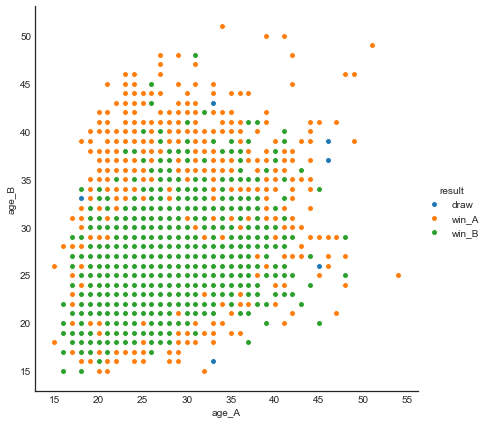

In [100]:
# Best feature one is age_diff.

print(df[['age_diff', 'result']].groupby('result').mean())

g = sns.FacetGrid(df, hue='result', size = 6)
g.map(plt.scatter, 'age_A', 'age_B', edgecolor="w")
g.add_legend()

plt.show()

        height_adv
result            
draw      0.507692
win_A     1.020171
win_B    -0.746310


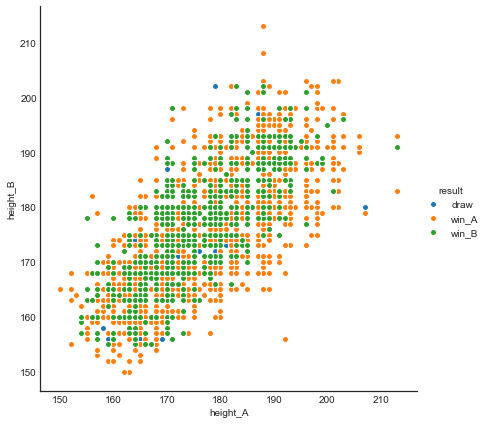

In [101]:
# Best feature two is height.

print(df[['height_adv', 'result']].groupby('result').mean())

g = sns.FacetGrid(df, hue='result', size = 6)
g.map(plt.scatter, 'height_A', 'height_B', edgecolor="w")
g.add_legend()

plt.show()

        reach_adv
result           
draw     1.200000
win_A    1.076811
win_B   -0.637454


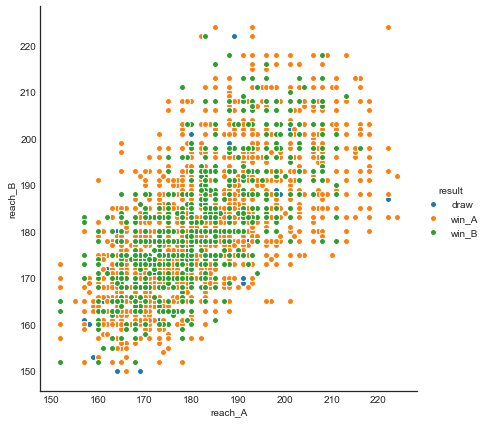

In [102]:
# Best feature three is reach.

print(df[['reach_adv', 'result']].groupby('result').mean())

g = sns.FacetGrid(df, hue='result', size = 6)
g.map(plt.scatter, 'reach_A', 'reach_B', edgecolor="w")
g.add_legend()

plt.show()

        weight_adv
result            
draw     -1.873846
win_A    -0.350008
win_B    -0.701107


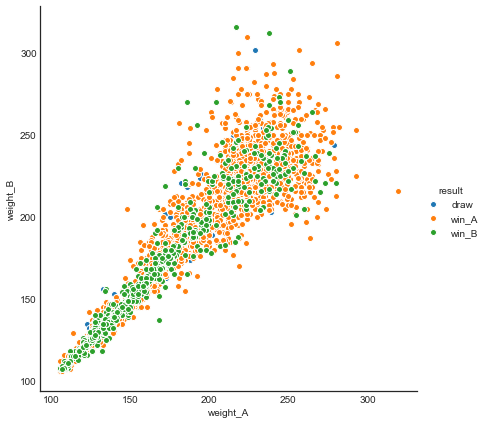

In [103]:
# Best feature four is weight.

print(df[['weight_adv', 'result']].groupby('result').mean())

g = sns.FacetGrid(df, hue='result', size = 6)
g.map(plt.scatter, 'weight_A', 'weight_B', edgecolor="w")
g.add_legend()

plt.show()

        experience
result            
draw      1.289231
win_A    -2.117638
win_B     6.657749


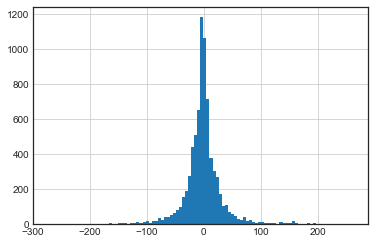

In [105]:
# Best feature five is experience, which could potentially eliminate our prediction that the fighter with the greatest physical
# advantage typically wins.

print(df[['experience', 'result']].groupby('result').mean())

df.experience.hist(bins=100)

plt.show()

Our five best features reveal that the younger fighter, taller fighter and the figher with the greatest reach wins more often on average. The fighters weight does not show an advantage until you get into the heavyweight division where there are not weight limits such as in the lower weight classes. And finally, we created a feature for experience because the opposite belief in our scenario would be that experience matters more than 'muscle' or the physical advantages we use to predict which fighter will win. In our model, we see the least experienced fighter wins on average.